<a href="https://colab.research.google.com/github/robins114/DM2025-Lab2-Exercise/blob/main/DM2025_Lab2_Master_Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Colab Environment Setup**

In [1]:
import kagglehub

# Importing our Google News Data
google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')


Using Colab cache for faster access to the 'google-news-vectors' dataset.
Data source import complete.


In [2]:
google_news_vectors_path

'/kaggle/input/google-news-vectors'

In [3]:
# Clone Lab 2's github repository to get all of our material first

!git clone https://github.com/difersalest/DM2025-Lab2-Exercise.git

fatal: destination path 'DM2025-Lab2-Exercise' already exists and is not an empty directory.


In [4]:
# Installing all of our dependencies
# The lab in colab was tested with this, and everything should work as intended
# If in your case something is not working please notify the TAs
!pip3 install python-dotenv==1.1.1 gensim==4.3.3 tensorflow==2.20.0 tensorflow-hub==0.16.1 keras==3.11.3 jupyter==1.1.1 scikit-learn==1.7.1 pandas==2.3.2 numpy==1.26.4 matplotlib==3.10.6 plotly==6.3.0 seaborn==0.13.2 nltk==3.9.1 umap-learn==0.5.9.post2

In [5]:
# test code for environment setup
# import library
import dotenv
import gensim
import tensorflow
import tensorflow_hub
import keras
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.20.0
keras: 3.11.3


##### **OPTIONAL: If you want to save your outputs you can send them to your own drive by mounting the drive in the following way (uncomment the lines):**

In [6]:

# Remember to change the directory of your outputs to your folder in the new mounted google drive inside colab
# from google.colab import drive
# drive.mount('/content/drive/')


**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://drive.google.com/uc?export=view&id=1qurztXdx30Wl2vkCZg7KXXJYJXcE6YR_)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [7]:
import pandas as pd

### training data
anger_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [8]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [9]:
### testing data
anger_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [10]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [11]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


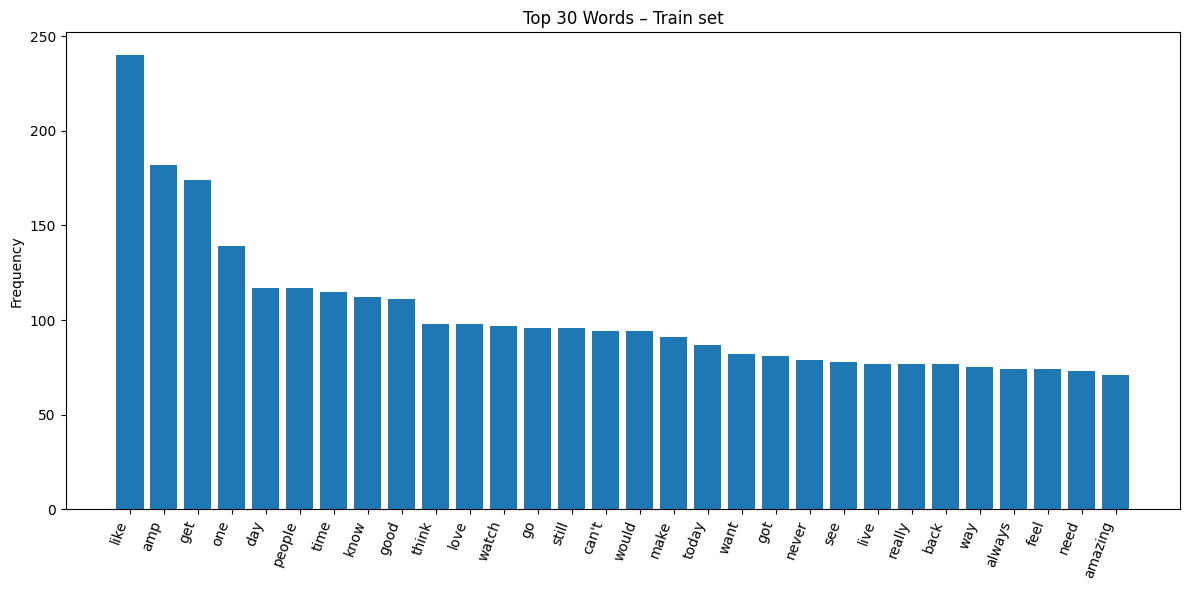

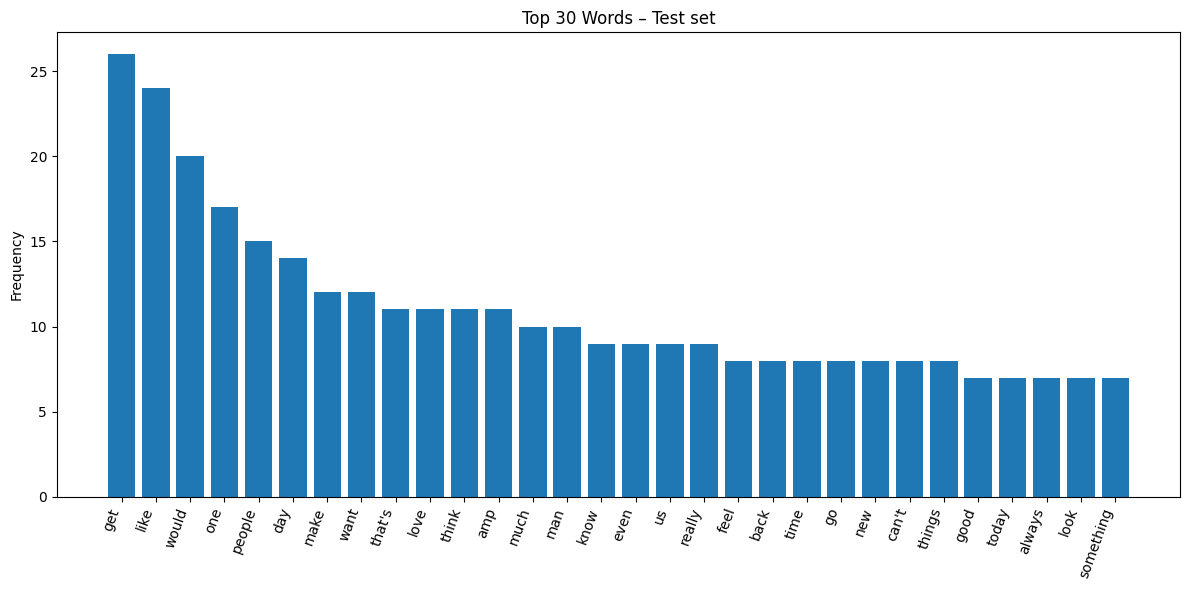

,word,count
0,like,240
1,amp,182
2,get,174
3,one,139
4,day,117
5,people,117
6,time,115
7,know,112
8,good,111
9,think,98


,word,count
0,get,26
1,like,24
2,would,20
3,one,17
4,people,15
5,day,14
6,make,12
7,want,12
8,that's,11
9,love,11


In [12]:
# --- Exercise 1: Top-30 word frequencies in train and test ---

import re
import string
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# --- optional stopwords setup ---
try:
    import nltk
    from nltk.corpus import stopwords
    try:
        _ = stopwords.words("english")
    except LookupError:
        nltk.download("stopwords")
    STOPWORDS = set(stopwords.words("english"))
except Exception:
    STOPWORDS = {
        "the","a","an","and","or","but","to","of","in","on","for","is","are",
        "was","were","be","been","am","i","you","he","she","it","we","they",
        "me","my","our","your","their","this","that","these","those","with",
        "as","at","by","from","about","into","up","down","out","over","after",
        "so","not","no","just","than","then","too","very","can","could","would","should"
    }

URL_RE   = re.compile(r"https?://\S+|www\.\S+")
MENTION  = re.compile(r"[@#]\w+")
NONWORD  = re.compile(r"[^a-z']+")

# --- Tokenize and count words for train ---
counter_train = Counter()
for text in train_df["text"].astype(str):
    text = text.lower()
    text = URL_RE.sub(" ", text)
    text = MENTION.sub(" ", text)
    text = NONWORD.sub(" ", text)
    tokens = [t.strip("'") for t in text.split()]
    tokens = [t for t in tokens if t and t not in STOPWORDS and len(t) > 1]
    counter_train.update(tokens)

top_train = counter_train.most_common(30)
words_train, counts_train = zip(*top_train) if top_train else ([], [])

# --- Tokenize and count words for test ---
counter_test = Counter()
for text in test_df["text"].astype(str):
    text = text.lower()
    text = URL_RE.sub(" ", text)
    text = MENTION.sub(" ", text)
    text = NONWORD.sub(" ", text)
    tokens = [t.strip("'") for t in text.split()]
    tokens = [t for t in tokens if t and t not in STOPWORDS and len(t) > 1]
    counter_test.update(tokens)

top_test = counter_test.most_common(30)
words_test, counts_test = zip(*top_test) if top_test else ([], [])

# --- Plot for train set ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(words_train)), counts_train)
plt.xticks(range(len(words_train)), words_train, rotation=70, ha="right")
plt.ylabel("Frequency")
plt.title("Top 30 Words – Train set")
plt.tight_layout()
plt.show()

# --- Plot for test set ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(words_test)), counts_test)
plt.xticks(range(len(words_test)), words_test, rotation=70, ha="right")
plt.ylabel("Frequency")
plt.title("Top 30 Words – Test set")
plt.tight_layout()
plt.show()

# --- Optional: Display top words as tables ---
display(pd.DataFrame(top_train, columns=["word", "count"]))
display(pd.DataFrame(top_test, columns=["word", "count"]))

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [13]:
# save to pickle file
train_df.to_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df.to_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

In [14]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [15]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


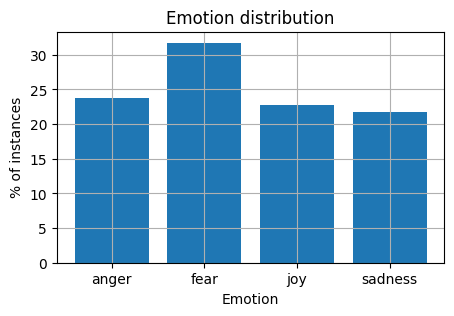

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [19]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [20]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [21]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [22]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [24]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [25]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [26]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [27]:
train_data_BOW_features_500.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [29]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [30]:
# Answer here
# --- Exercise 2: TF-IDF Vectorizer with 1000 features ---

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Make sure the tokenizer is available (optional but consistent with previous cells)
nltk.download('punkt_tab')

# Initialize TF-IDF Vectorizer with up to 1000 features
TFIDF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Learn the vocabulary and IDF weights from training data
TFIDF_vectorizer.fit(train_df['text'])

# Transform both train and test datasets into TF-IDF features
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(test_df['text'])

# Check the dimension (should be [3613, 1000] for train)
print("Train TF-IDF shape:", train_data_TFIDF_features.shape)
print("Test  TF-IDF shape:", test_data_TFIDF_features.shape)

# Show feature names (100–110)
feature_names_TFIDF = TFIDF_vectorizer.get_feature_names_out()
print("Feature names [100:110]:")
print(feature_names_TFIDF[100:110])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Train TF-IDF shape: (3613, 1000)
Test  TF-IDF shape: (347, 1000)
Feature names [100:110]:
['attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby' 'back'
 'bad']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [32]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'anger', 'fear', 'sadness', 'sadness', 'fear',
       'joy', 'joy', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [33]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [34]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [35]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [36]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

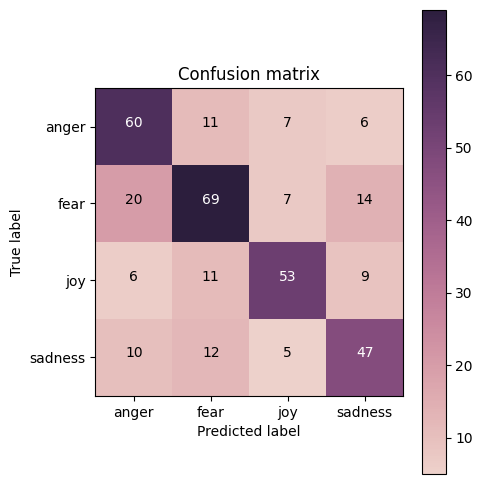

In [37]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [38]:
# Answer here
'''
The model performs well on the training data (99% accuracy) but generalizes poorly to new data (68% accuracy), which indicates overfitting.
Precision, recall, and F1-scores range between 0.66 and 0.71, meaning the classifier recognizes emotions moderately well, with “joy” being detected most accurately.
The confusion matrix shows that the model often mixes up the generally negative emotions anger and fear or fear and sadness.
'''

'\nThe model performs well on the training data (99% accuracy) but generalizes poorly to new data (68% accuracy), which indicates overfitting.\nPrecision, recall, and F1-scores range between 0.66 and 0.71, meaning the classifier recognizes emotions moderately well, with “joy” being detected most accurately.\nThe confusion matrix shows that the model often mixes up the generally negative emotions anger and fear or fear and sadness.\n'

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Using label column: 'emotion'

Training Accuracy: 0.86
Testing Accuracy:  0.76

Classification Report:
              precision    recall  f1-score   support

       anger       0.83      0.71      0.77        84
        fear       0.65      0.92      0.76       110
         joy       0.85      0.72      0.78        79
     sadness       0.85      0.59      0.70        74

    accuracy                           0.76       347
   macro avg       0.79      0.74      0.75       347
weighted avg       0.78      0.76      0.75       347



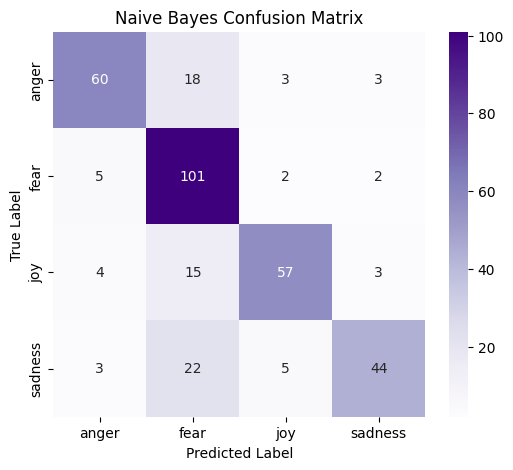

In [39]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Automatically detect label column ---
possible_labels = ["label", "emotion", "category", "sentiment"]
label_col = None
for col in possible_labels:
    if col in train_df.columns:
        label_col = col
        break

if label_col is None:
    raise KeyError("No label column found. Please check your DataFrame columns.")

print(f"Using label column: '{label_col}'")

# --- Use the same TF-IDF features created earlier ---
# (You can switch to train_data_BOW_features if you used Bag-of-Words)
X_train = train_data_TFIDF_features
X_test = test_data_TFIDF_features
y_train = train_df[label_col]
y_test = test_df[label_col]

# --- Train Naive Bayes ---
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# --- Predictions ---
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# --- Accuracy ---
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTraining Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_test_pred)
labels = sorted(list(set(y_test)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [40]:
# Answer here
'''
The Decision Tree reached about 99% training accuracy but only 68% on test data, showing overfitting. In contrast, the Naive Bayes model achieved around 76% test accuracy with more balanced results across emotions, indicating better generalization.

The difference comes from model design: Decision Trees have high variance and tend to overfit sparse text data, while Naive Bayes, with its simple probabilistic approach and smoothing, handles word frequency data more effectively.

In the confusion matrix, Naive Bayes confuses similar emotions like anger and fear, but performs more consistently overall. Thus, Naive Bayes proves more suitable for text classification, offering more stable results compared to the overfitted Decision Tree.
'''


'\nThe Decision Tree reached about 99% training accuracy but only 68% on test data, showing overfitting. In contrast, the Naive Bayes model achieved around 76% test accuracy with more balanced results across emotions, indicating better generalization.\n\nThe difference comes from model design: Decision Trees have high variance and tend to overfit sparse text data, while Naive Bayes, with its simple probabilistic approach and smoothing, handles word frequency data more effectively.\n\nIn the confusion matrix, Naive Bayes confuses similar emotions like anger and fear, but performs more consistently overall. Thus, Naive Bayes proves more suitable for text classification, offering more stable results compared to the overfitted Decision Tree.\n'

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://drive.google.com/uc?export=view&id=1DKd43x7RNHTa2gn_HUV2SRNJ7MhV0dKh)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [41]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [42]:
import keras

In [43]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [44]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2429     joy
1699    fear
2277     joy
1117    fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [45]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [46]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://drive.google.com/uc?export=view&id=1F_RmXNBo3uUPyopFmYne61s-H4ecl-iz)

In [47]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [48]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('./DM2025-Lab2-Exercise/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 57s 451ms/step - accuracy: 0.3673 - loss: 1.3313 - val_accuracy: 0.4438 - val_loss: 1.2869
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 140ms/step - accuracy: 0.6272 - loss: 1.0023 - val_accuracy: 0.6715 - val_loss: 0.9260
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.7827 - loss: 0.6005 - val_accuracy: 0.6772 - val_loss: 0.7899
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8433 - loss: 0.4246 - val_accuracy: 0.7032 - val_loss: 0.7759
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8821 - loss: 0.3294 - val_accuracy: 0.7032 - val_loss: 0.7704
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9064 - loss: 0.2724 - val_accuracy: 0.7118 - val_loss: 0.8960
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9231 - loss: 0.2292 - val_accuracy: 0.6801 - val_loss: 0.8770
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9397 - loss: 0.1881 - val

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [49]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


array([[9.9967629e-01, 2.9016313e-05, 3.4816021e-05, 2.5986045e-04],
       [1.3358351e-02, 9.8531193e-01, 1.3273465e-03, 2.3221291e-06],
       [9.9994719e-01, 7.9468555e-06, 2.4003603e-07, 4.4657198e-05],
       [5.4365051e-01, 2.3734048e-01, 5.7374105e-02, 1.6163494e-01],
       [9.0202570e-01, 2.4965594e-03, 3.7199609e-02, 5.8278095e-02]],
      dtype=float32)

In [50]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'anger', 'anger', 'anger'], dtype=object)

In [51]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [52]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("./DM2025-Lab2-Exercise/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.367285,1.331323,0.443804,1.286924
1,1,0.627180,1.002255,0.671470,0.925975
2,2,0.782729,0.600468,0.677233,0.789927
3,3,0.843343,0.424608,0.703170,0.775882
4,4,0.882092,0.329411,0.703170,0.770427
5,5,0.906449,0.272366,0.711816,0.896008
6,6,0.923056,0.229180,0.680115,0.877005
7,7,0.939662,0.188076,0.688761,0.942141
8,8,0.951010,0.160426,0.685879,1.038430
9,9,0.958206,0.138471,0.680115,1.065839


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](https://drive.google.com/uc?export=view&id=1cYxbZ-72ZJucyUdOsRUEodH203ldZScM)  ![pic4.png](https://drive.google.com/uc?export=view&id=1LybXXqULWkB7IGO3X5g8rLYFx7lhSoms)


Best epoch (val_accuracy): 6  |  val_accuracy = 0.712


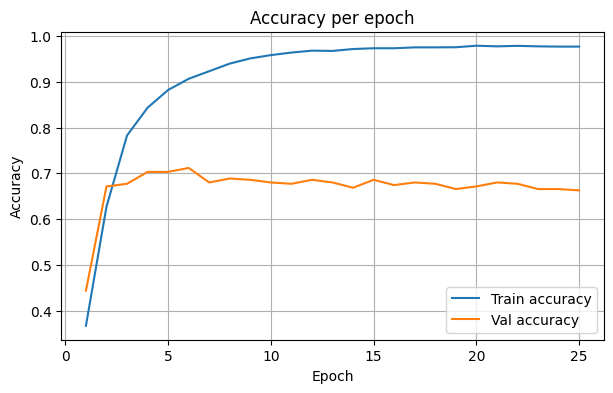

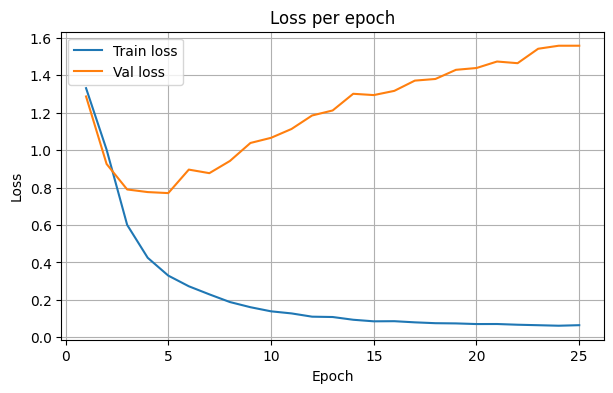

In [53]:
# Answer here
# --- Exercise 6: Plot train/val Accuracy and Loss ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Get the log (prefer Keras history; fall back to CSV)
if 'history' in globals() and hasattr(history, 'history'):
    log = pd.DataFrame(history.history)
else:
    log_path = "./DM2025-Lab2-Exercise/logs/training_log.csv"
    assert os.path.exists(log_path), f"Log not found at {log_path}"
    log = pd.read_csv(log_path)

epochs = np.arange(1, len(log) + 1)

# Best epoch (by validation accuracy)
best_idx = int(log['val_accuracy'].idxmax())
best_epoch = best_idx + 1
best_val_acc = log.loc[best_idx, 'val_accuracy']

print(f"Best epoch (val_accuracy): {best_epoch}  |  val_accuracy = {best_val_acc:.3f}")

# --- Accuracy plot ---
plt.figure(figsize=(7,4))
plt.plot(epochs, log['accuracy'], label='Train accuracy')
plt.plot(epochs, log['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy per epoch'); plt.legend(); plt.grid(True)
plt.show()

# --- Loss plot ---
plt.figure(figsize=(7,4))
plt.plot(epochs, log['loss'], label='Train loss')
plt.plot(epochs, log['val_loss'], label='Val loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss per epoch'); plt.legend(); plt.grid(True)
plt.show()


In [54]:
'''
The graphs show that training accuracy keeps increasing steadily and reaches a very high value, while validation accuracy improves only during the first few epochs and then levels off or slightly decreases.
At the same time, the training loss continues to decrease, but the validation loss starts increasing after a few epochs.

This pattern indicates overfitting — the model learns the training data too well, including noise and irrelevant patterns, but fails to generalize the data well.
Early on, both curves improve together, showing good learning. However, after around epoch 5–8, the widening gap between training and validation metrics shows that the model’s complexity is too high for the available data or that training went on for too long.

In short, the model fits the training set extremely well but performs worse on the validation set, demonstrating overfitting rather than underfitting. To fix this, one could use early stopping, regularization, or fewer epochs.
'''

'\nThe graphs show that training accuracy keeps increasing steadily and reaches a very high value, while validation accuracy improves only during the first few epochs and then levels off or slightly decreases.\nAt the same time, the training loss continues to decrease, but the validation loss starts increasing after a few epochs.\n\nThis pattern indicates overfitting — the model learns the training data too well, including noise and irrelevant patterns, but fails to generalize the data well.\nEarly on, both curves improve together, showing good learning. However, after around epoch 5–8, the widening gap between training and validation metrics shows that the model’s complexity is too high for the available data or that training went on for too long.\n\nIn short, the model fits the training set extremely well but performs worse on the validation set, demonstrating overfitting rather than underfitting. To fix this, one could use early stopping, regularization, or fewer epochs.\n'

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [55]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2429,30425,Watch this amazing live.ly broadcast by @broit...,"[Watch, this, amazing, live.ly, broadcast, by,..."
1699,20842,"When I walk in darkness of despondency, Sc.ver...","[When, I, walk, in, darkness, of, despondency,..."
2277,30273,Watching Avatar and wondering why I took so lo...,"[Watching, Avatar, and, wondering, why, I, too..."
1117,20260,ugh!! this is the worst!! i didn't read at all...,"[ugh, !, !, this, is, the, worst, !, !, i, did..."
3291,40464,and naoto nod she also like tha bands. but she...,"[and, naoto, nod, she, also, like, tha, bands,..."


In [56]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Watch', 'this', 'amazing', 'live.ly', 'broadcast', 'by', '@', 'broitzmax', '#', 'lively', '#', 'musically']),
       list(['When', 'I', 'walk', 'in', 'darkness', 'of', 'despondency', ',', 'Sc.verses', 'I', "'ve", 'memorized', 'shine', 'a', 'light', 'in', 'my', 'heart', '.', 'Ex', ':', 'Lam', '3:22-25', '#', 'despondency']),
       list(['Watching', 'Avatar', 'and', 'wondering', 'why', 'I', 'took', 'so', 'long', 'to', 'watch', 'this', '*', 'collapses', 'in', 'a', 'joyous', 'heap', '*'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [57]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [58]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.46211943,  0.21848527, -0.29930803,  0.30031225, -0.07305949,
       -1.0844762 ,  0.71948814,  1.164666  , -0.3414409 , -0.64793694,
       -0.57033634, -0.49537006, -0.22467938,  0.317484  , -0.17881227,
       -0.26930892,  0.80142653, -0.35714662,  0.2978361 , -1.2953005 ,
        0.57032853,  0.55866784,  0.31548592, -0.13087563,  0.35589254,
       -0.11569329, -0.5678592 ,  0.649094  , -0.25871935,  0.3790251 ,
        0.36321658, -0.18965364,  0.6625807 , -0.42248508, -0.12528403,
        1.0755217 ,  0.16147712, -0.1313414 , -0.6243256 , -0.33315647,
        0.3491786 , -0.1534559 , -0.48010907,  0.2524093 ,  0.5030156 ,
       -0.2671044 , -0.27768332, -0.11448124,  0.70916814,  0.2472856 ,
        0.20241714, -0.4179313 , -0.31726417,  0.28457204, -0.90552646,
       -0.0483682 ,  0.05453927, -0.4826845 , -0.15308549,  0.28524256,
        0.17636572, -0.23946089,  0.41889074,  0.14678155, -0.74188924,
        0.8777997 ,  0.23796092,  0.47115585, -1.7570624 ,  0.79

In [59]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('muslims', 0.9173017740249634),
 ('Makes', 0.9166086912155151),
 ('Be', 0.9075038433074951),
 ('angry', 0.9069862961769104),
 ('ukedchat', 0.906954288482666),
 ('cats', 0.903268039226532),
 ("'you", 0.9022358655929565),
 ('help', 0.8999148011207581),
 ('🕋', 0.8978508114814758),
 ('successful', 0.8971956968307495)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [60]:
from gensim.models import KeyedVectors

## Note: this model is huge, this will take some time ...
model_path = f"{google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [61]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [62]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [63]:
# --- Fix: create `text_tokenized` and then build sentence embeddings + model ---

import re
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 0) pick the text column
possible_text_cols = ["text", "tweet", "sentence", "content"]
text_col = next((c for c in possible_text_cols if c in train_df.columns), None)
if text_col is None:
    raise KeyError(f"No text column found. Looked for: {possible_text_cols}")

# 1) tokenizer (nltk if available, else simple regex)
def _simple_tok(s: str):
    return re.findall(r"[A-Za-z]+(?:'[A-Za-z]+)?", s.lower())

try:
    import nltk
    try:
        nltk.data.find("tokenizers/punkt")
    except LookupError:
        nltk.download("punkt", quiet=True)
    tok = lambda s: nltk.word_tokenize(str(s))
except Exception:
    tok = lambda s: _simple_tok(str(s))

# 2) ensure tokenized columns exist
if "text_tokenized" not in train_df.columns:
    train_df["text_tokenized"] = train_df[text_col].astype(str).apply(tok)
if "text_tokenized" not in test_df.columns:
    test_df["text_tokenized"] = test_df[text_col].astype(str).apply(tok)

# 3) get an embedding model already loaded (kv may be None; we’ll handle it)
kv = None
if 'word2vec_model' in globals():
    kv = word2vec_model.wv
elif 'w2v_google_model' in globals():
    kv = w2v_google_model
elif 'glove_twitter_25_model' in globals():
    kv = glove_twitter_25_model

embed_dim = (kv.vector_size if kv is not None else 100)
print("Using embeddings with dimension:", embed_dim)

# 4) sentence -> vector (mean pooling; zeros if no known words or no model)
def sent_vec(tokens):
    if kv is None:
        return np.zeros(embed_dim, dtype=np.float32)
    vecs = [kv[w] for w in tokens if w in kv]
    return (np.mean(vecs, axis=0) if vecs else np.zeros(embed_dim, dtype=np.float32))

X_train = np.vstack([sent_vec(t) for t in train_df["text_tokenized"]])
X_test  = np.vstack([sent_vec(t) for t in test_df["text_tokenized"]])

# 5) labels
possible_labels = ["label", "emotion", "category", "sentiment"]
label_col = next((c for c in possible_labels if c in train_df.columns), None)
if label_col is None:
    raise KeyError(f"No label column found. Looked for: {possible_labels}")
y_train = train_df[label_col].values
y_test  = test_df[label_col].values

# 6) train & evaluate
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

Using embeddings with dimension: 100
Test accuracy: 0.360
              precision    recall  f1-score   support

       anger       0.43      0.14      0.21        84
        fear       0.37      0.82      0.51       110
         joy       0.29      0.22      0.25        79
     sadness       0.40      0.08      0.13        74

    accuracy                           0.36       347
   macro avg       0.37      0.31      0.28       347
weighted avg       0.37      0.36      0.30       347



---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](https://drive.google.com/uc?export=view&id=1YaPsXWrr7sQFHelMyiNuERs2lG1tZZ54)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [64]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [65]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](https://drive.google.com/uc?export=view&id=1loQX4BJI3MlcNmlpjVvqqNTLQSOmxfC4)

In [66]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [67]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://drive.google.com/uc?export=view&id=1YgtPqQJysWiWKCOvGVjpA07gwgqap3a6)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](https://drive.google.com/uc?export=view&id=1NQsoRSWGYAya0dyDefPXYy7l7Ag6a5UT)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [68]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

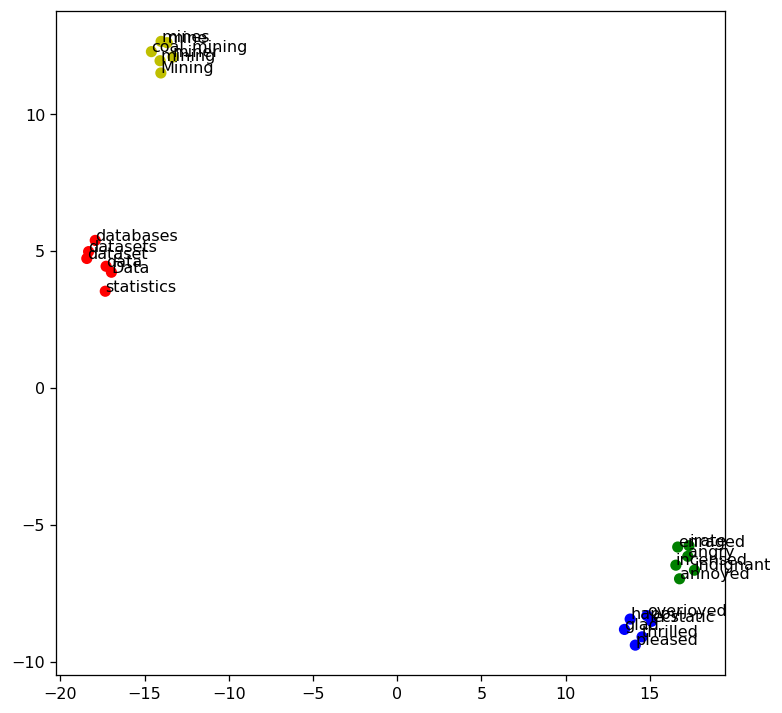

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

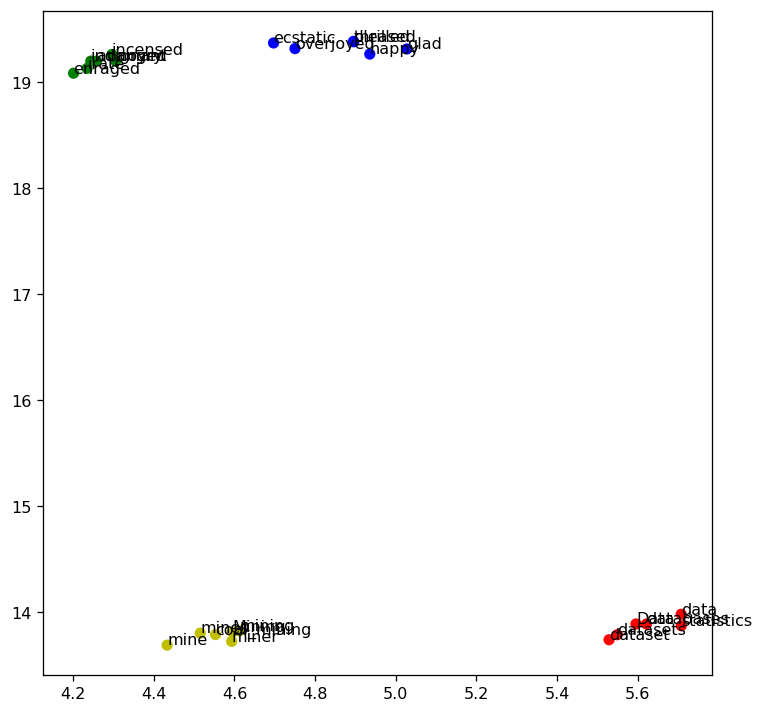

In [70]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Total words: 60 (should be 60). Example: ['irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged']


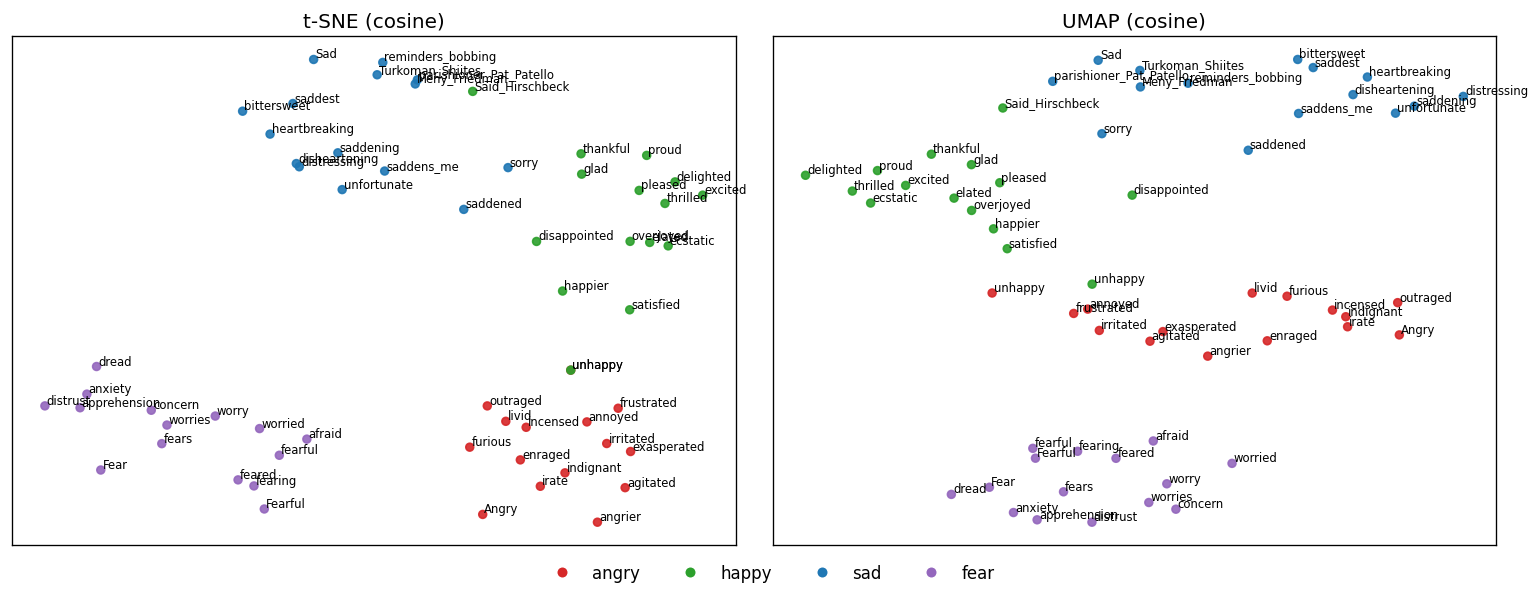

In [71]:
# Answer here
# --- Exercise 8: t-SNE & UMAP of nearest neighbors for 4 emotions ---

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 1) pick an embedding model already loaded (GoogleNews, your w2v, or GloVe)
if 'w2v_google_model' in globals():
    kv = w2v_google_model
elif 'word2vec_model' in globals():
    kv = word2vec_model.wv
elif 'glove_twitter_25_model' in globals():
    kv = glove_twitter_25_model
else:
    raise RuntimeError("No embedding model found. Load w2v_google_model / word2vec_model / glove_twitter_25_model first.")

# 2) collect 15 most similar words for each seed
seeds = ["angry", "happy", "sad", "fear"]
topn = 15

groups = {}
for s in seeds:
    # keep only neighbors that are actually in the vocab
    nn = [w for (w, sim) in kv.most_similar(s, topn=topn) if w in kv]
    groups[s] = nn

# flatten list and fetch vectors
labels = []
colors = []
palette = {"angry":"tab:red", "happy":"tab:green", "sad":"tab:blue", "fear":"tab:purple"}
for s in seeds:
    labels += groups[s]
    colors += [palette[s]] * len(groups[s])

X = np.vstack([kv[w] for w in labels])

print(f"Total words: {len(labels)} (should be {topn*len(seeds)}). Example:", labels[:10])

# 3) t-SNE (cosine metric works well for embeddings)
tsne = TSNE(n_components=2, metric="cosine", random_state=28, init="pca", perplexity=20)
X_tsne = tsne.fit_transform(X)

# 4) UMAP
try:
    import umap.umap_ as umap
except Exception:
    import umap   # some installs expose it directly
umap_model = umap.UMAP(n_components=2, metric="cosine", random_state=28, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X)

# 5) plot both
fig, axes = plt.subplots(1, 2, figsize=(13, 5), dpi=120)

# t-SNE
ax = axes[0]
ax.scatter(X_tsne[:,0], X_tsne[:,1], c=colors, s=22, alpha=0.9)
for (x, y, w) in zip(X_tsne[:,0], X_tsne[:,1], labels):
    ax.annotate(w, (x, y), xytext=(1, 1), textcoords="offset points", fontsize=7)
ax.set_title("t-SNE (cosine)")
ax.set_xticks([]); ax.set_yticks([])

# UMAP
ax = axes[1]
ax.scatter(X_umap[:,0], X_umap[:,1], c=colors, s=22, alpha=0.9)
for (x, y, w) in zip(X_umap[:,0], X_umap[:,1], labels):
    ax.annotate(w, (x, y), xytext=(1, 1), textcoords="offset points", fontsize=7)
ax.set_title("UMAP (cosine)")
ax.set_xticks([]); ax.set_yticks([])

# simple legend
handles = [plt.Line2D([0],[0], marker='o', color='w', markerfacecolor=palette[s], markersize=7, label=s) for s in seeds]
fig.legend(handles=handles, labels=seeds, loc="lower center", ncol=4, frameon=False)
plt.tight_layout(rect=[0,0.05,1,1])
plt.show()

In [72]:
'''
The t-SNE and UMAP visualizations both show how word embeddings can be projected into two dimensions, but they emphasize different aspects of the data.

t-SNE focuses on preserving local neighborhoods, by keeping similar words very close together. This results in well defined, compact emotion clusters (like angry, happy, sad, and fear), though the distances between clusters may not reflect true relationships as their global positions can be misleading.

UMAP, in contrast, provides a more balanced view. It still groups similar words together but also better maintains the overall structure of the space. As a result, related emotions such as fear and sad tend to appear near each other.
'''

'\nThe t-SNE and UMAP visualizations both show how word embeddings can be projected into two dimensions, but they emphasize different aspects of the data.\n\nt-SNE focuses on preserving local neighborhoods, by keeping similar words very close together. This results in well defined, compact emotion clusters (like angry, happy, sad, and fear), though the distances between clusters may not reflect true relationships as their global positions can be misleading.\n\nUMAP, in contrast, provides a more balanced view. It still groups similar words together but also better maintains the overall structure of the space. As a result, related emotions such as fear and sad tend to appear near each other.\n'

---